# 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('train.csv')


# 2. Initial Inspection

In [2]:
print("\n--- Data Overview ---")
print(df.shape)
print(df.dtypes)
print(df.head())


--- Data Overview ---
(9800, 18)
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer N

In [3]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicates: {duplicates}")
df = df.drop_duplicates()


Duplicates: 0


In [4]:
# Missing values using list comprehension
missing = {col: df[col].isnull().sum() for col in df.columns if df[col].isnull().sum() > 0}
print("\nMissing Values:", missing) 


Missing Values: {'Postal Code': np.int64(11)}


In [5]:
# Convert date columns if any
date_cols = [col for col in df.columns if 'date' in col.lower()]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

print("Date columns converted:", date_cols)
print(df[date_cols].dtypes)
print(df[date_cols].head())

Date columns converted: ['Order Date', 'Ship Date']
Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object
  Order Date  Ship Date
0 2017-11-08 2017-11-11
1 2017-11-08 2017-11-11
2 2017-06-12 2017-06-16
3 2016-10-11 2016-10-18
4 2016-10-11 2016-10-18


# 3. Descriptive Stats & Univariate Analysis

In [6]:
# Numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("\n--- Numerical Features ---")
print(df[num_cols].describe())



--- Numerical Features ---
            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


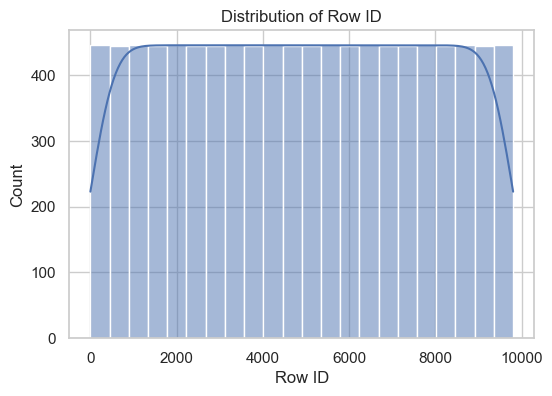

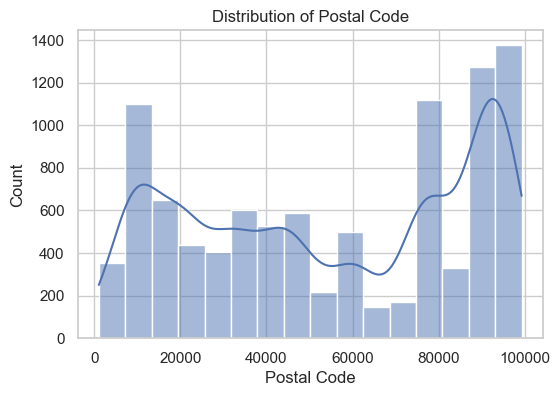

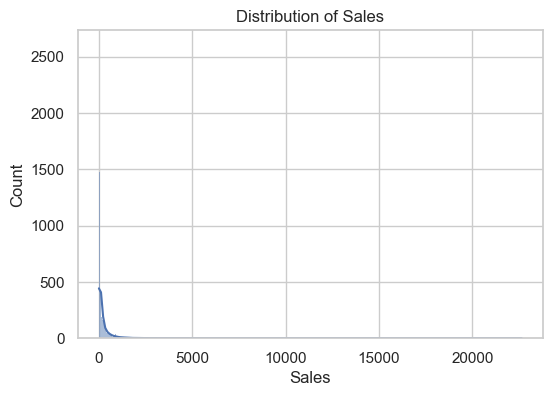

In [7]:
# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



--- Categorical Features ---
Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
US-2016-126977    10
                  ..
CA-2018-139619     1
CA-2017-101343     1
CA-2018-120999     1
CA-2018-107727     1
CA-2016-106320     1
Name: count, Length: 4922, dtype: int64


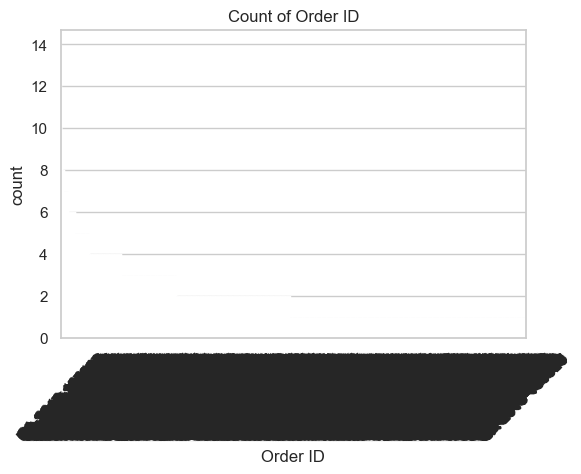

Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64


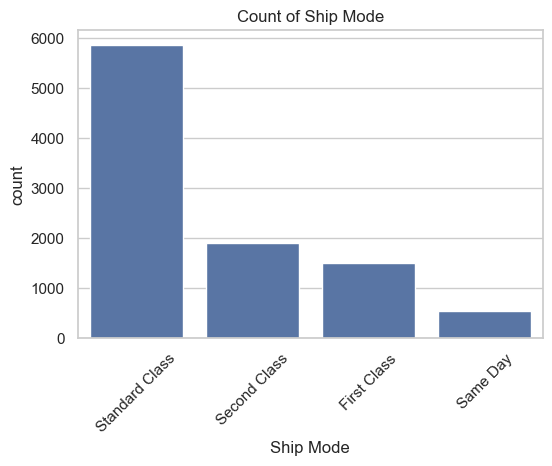

Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
JD-15895    32
            ..
LD-16855     1
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
Name: count, Length: 793, dtype: int64


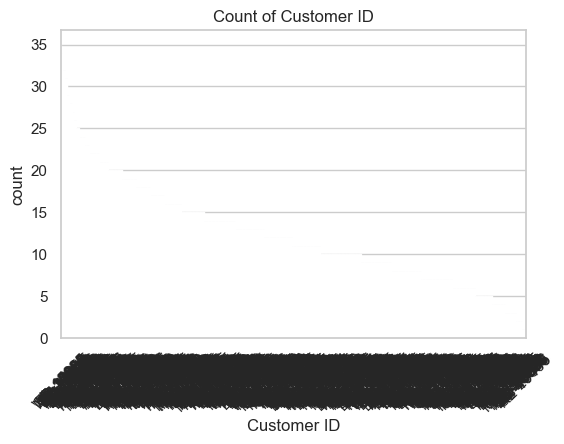

Customer Name
William Brown       35
Matt Abelman        34
Paul Prost          34
John Lee            33
Jonathan Doherty    32
                    ..
Lela Donovan         1
Jocasta Rupert       1
Carl Jackson         1
Sung Chung           1
Ricardo Emerson      1
Name: count, Length: 793, dtype: int64


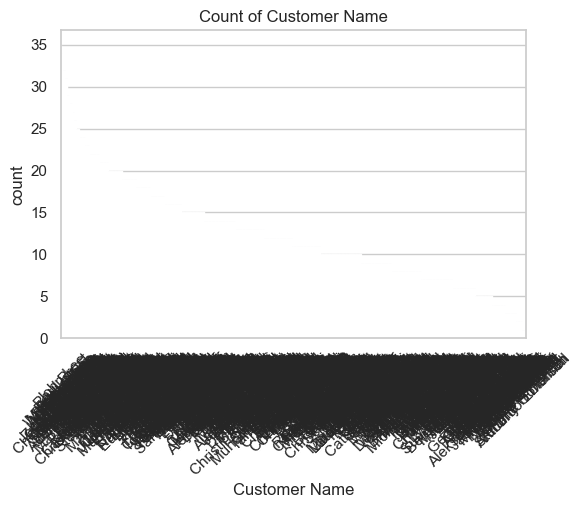

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


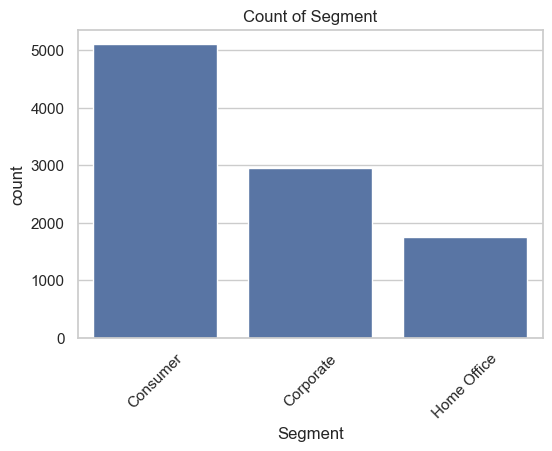

Country
United States    9800
Name: count, dtype: int64


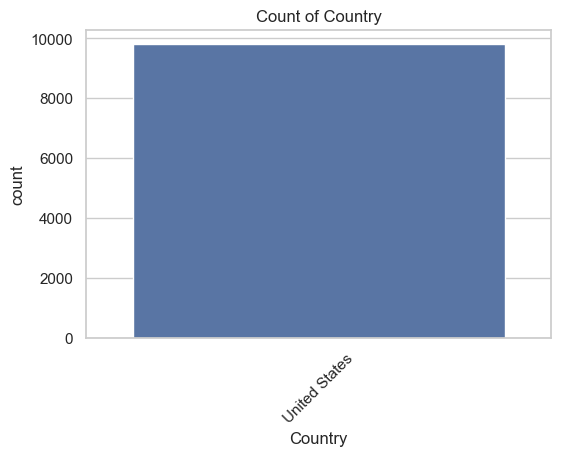

City
New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
Goldsboro          1
Montebello         1
Abilene            1
Normal             1
Springdale         1
Name: count, Length: 529, dtype: int64


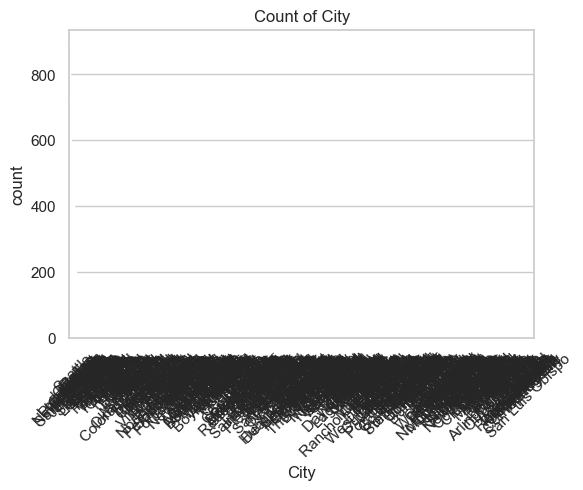

State
California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada  

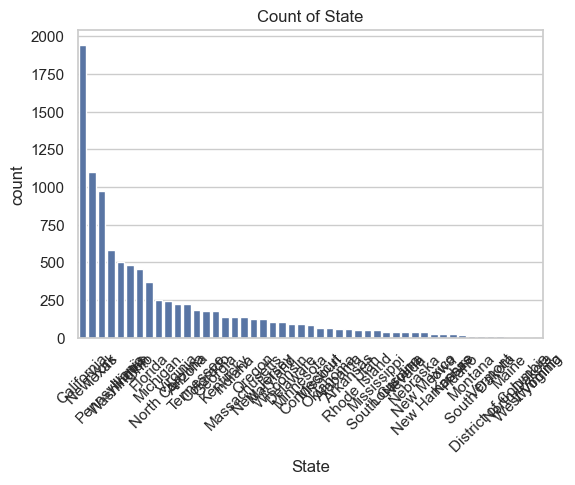

Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


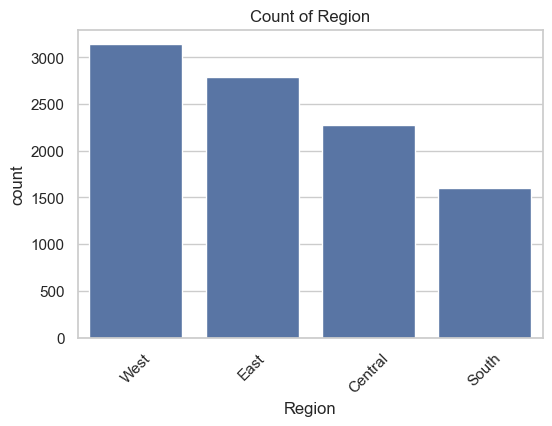

Product ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10003628    15
FUR-CH-10002647    15
                   ..
TEC-AC-10002380     1
TEC-PH-10002817     1
TEC-MA-10003589     1
OFF-AP-10003099     1
TEC-PH-10002645     1
Name: count, Length: 1861, dtype: int64


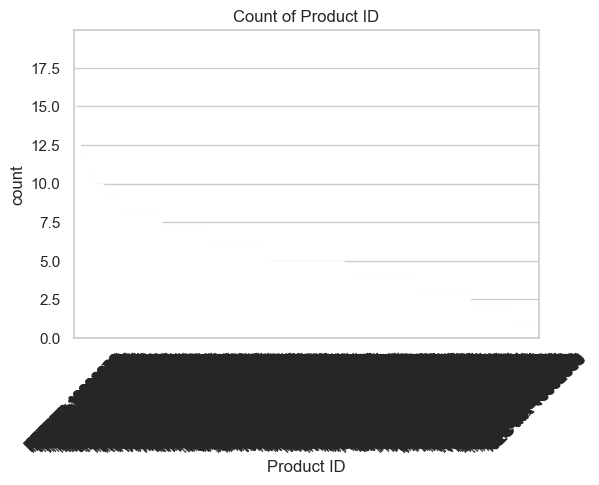

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64


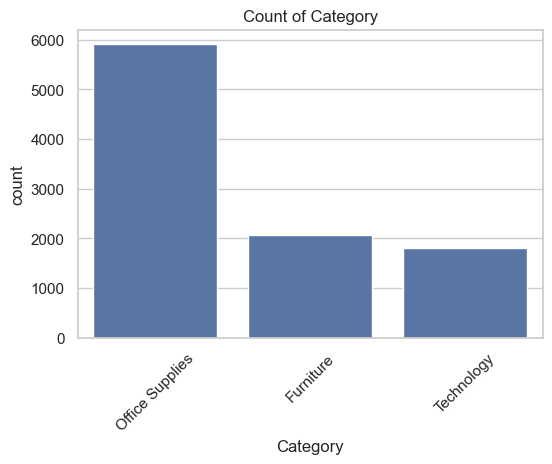

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64


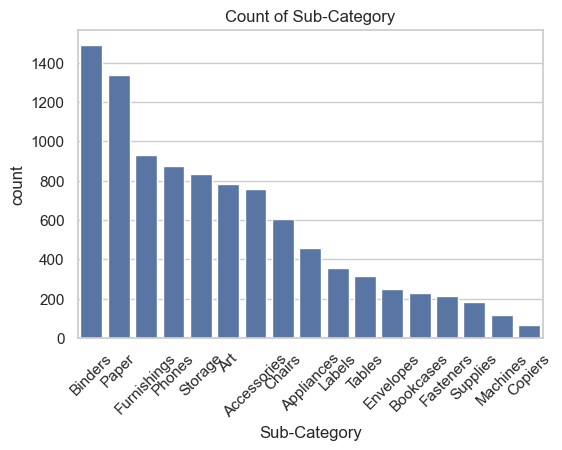

Product Name
Staple envelope                                               47
Staples                                                       46
Easy-staple paper                                             44
Avery Non-Stick Binders                                       20
Staples in misc. colors                                       18
                                                              ..
Avery 484                                                      1
Stride Job 150 Highlighters, Chisel Tip, Assorted Colors       1
Brother MFC-9340CDW LED All-In-One Printer, Copier Scanner     1
Grip Seal Envelopes                                            1
Penpower WorldCard Pro Card Scanner                            1
Name: count, Length: 1849, dtype: int64


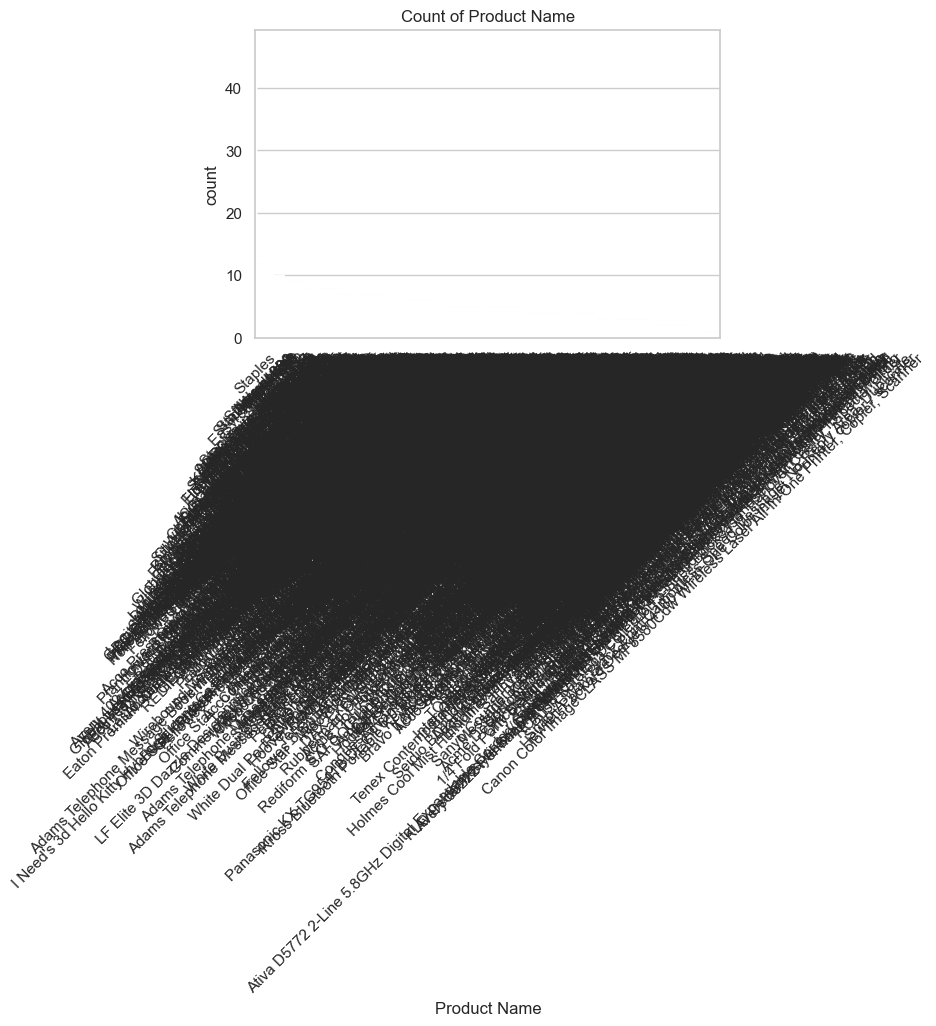

In [8]:
# Categorical features
print("\n--- Categorical Features ---")
for col in cat_cols:
    print(df[col].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

# 4. Bivariate Analysis

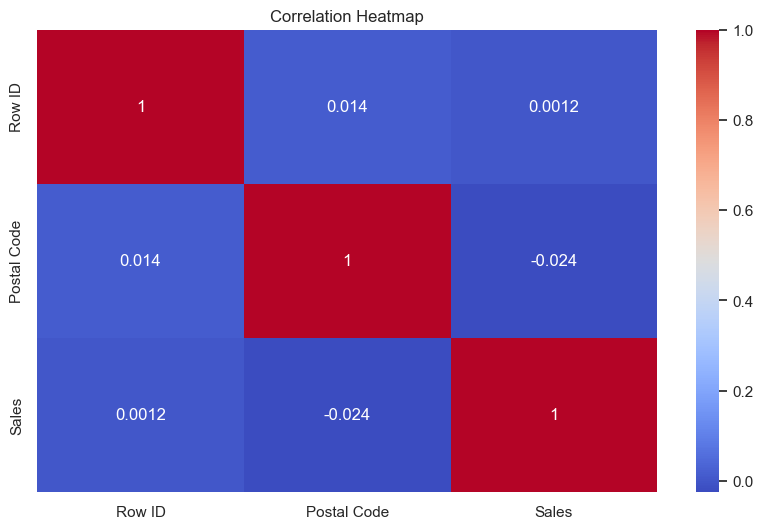

In [9]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

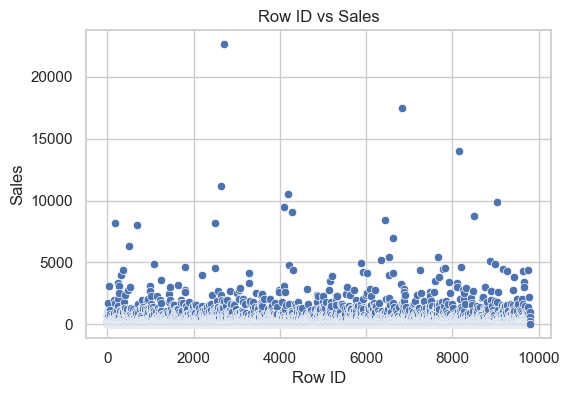

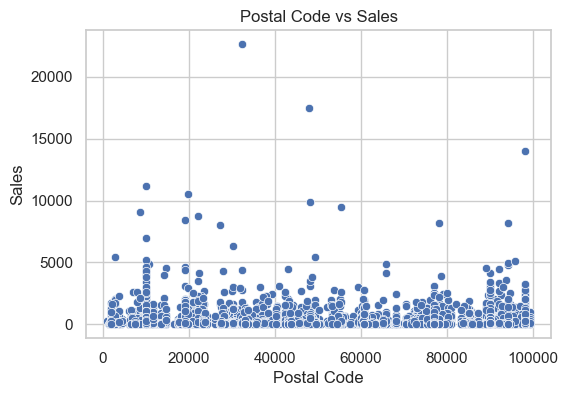

In [10]:
# Scatter plots
for col in num_cols:
    if col != 'Sales':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=col, y='Sales')
        plt.title(f'{col} vs Sales')
        plt.show()

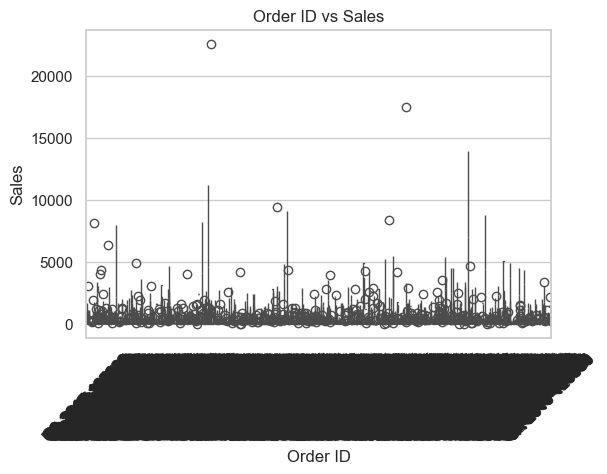

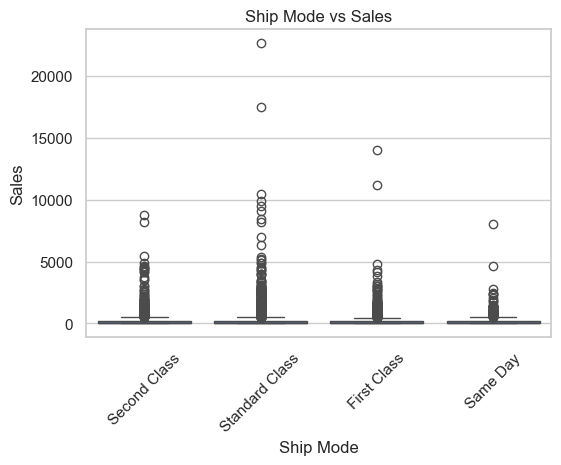

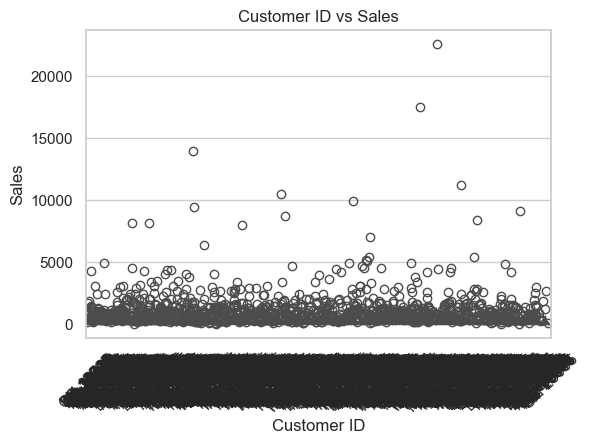

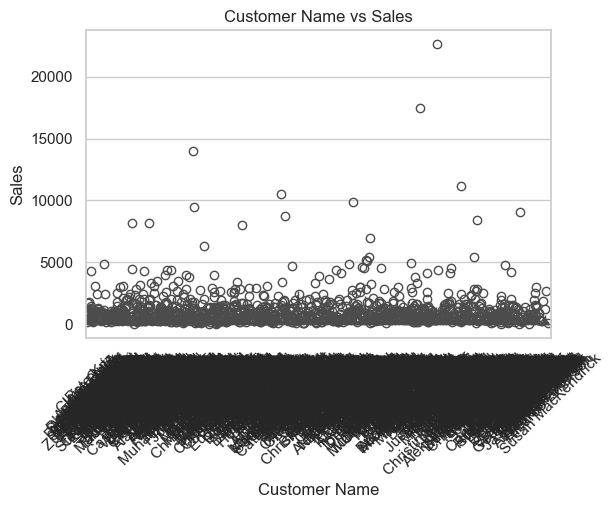

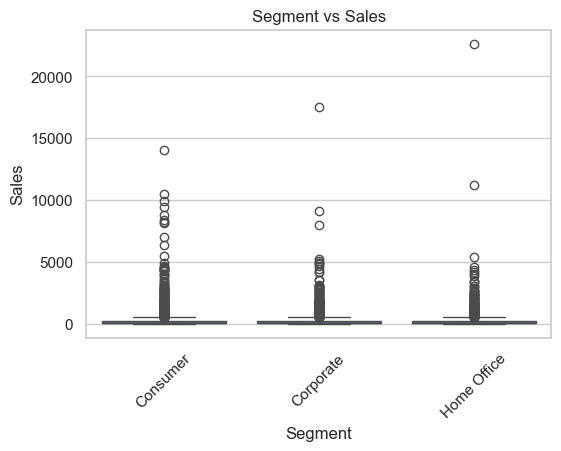

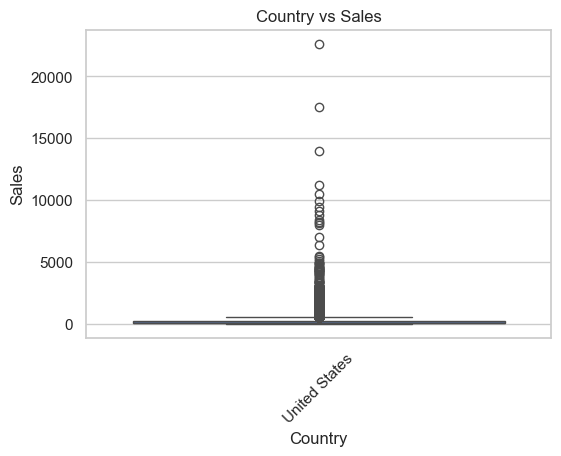

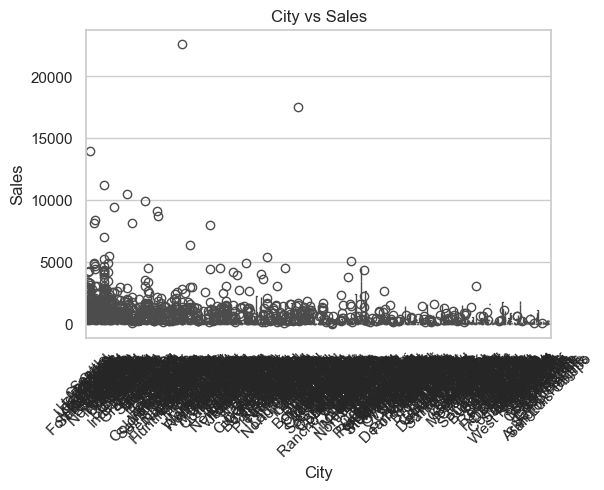

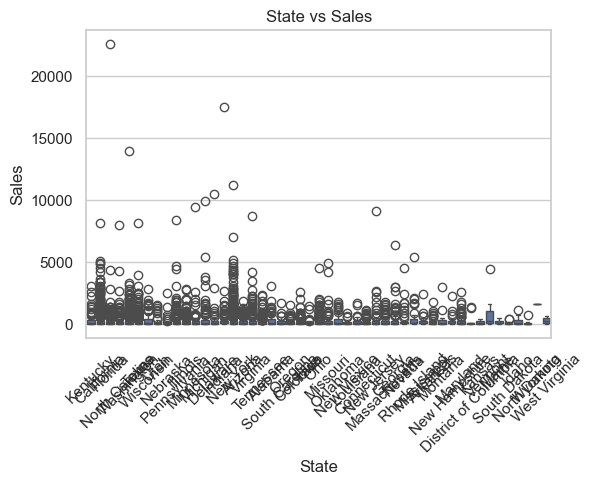

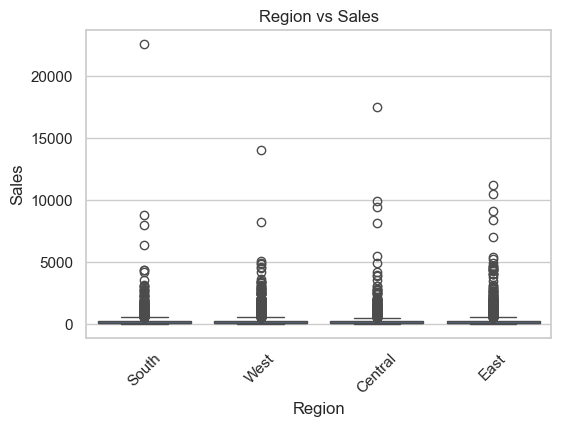

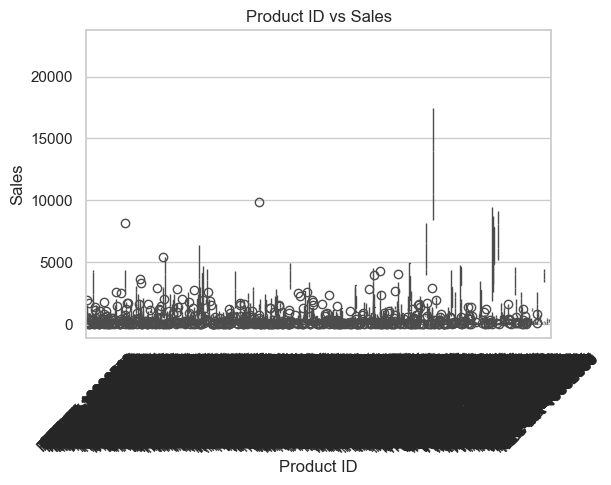

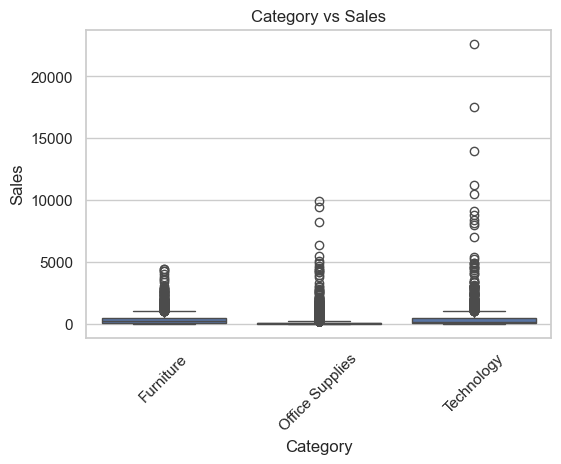

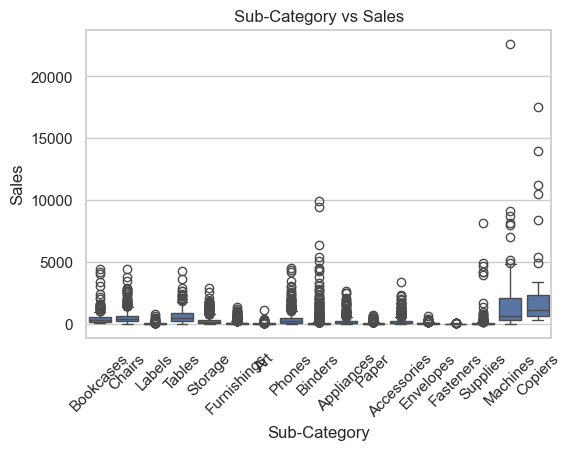

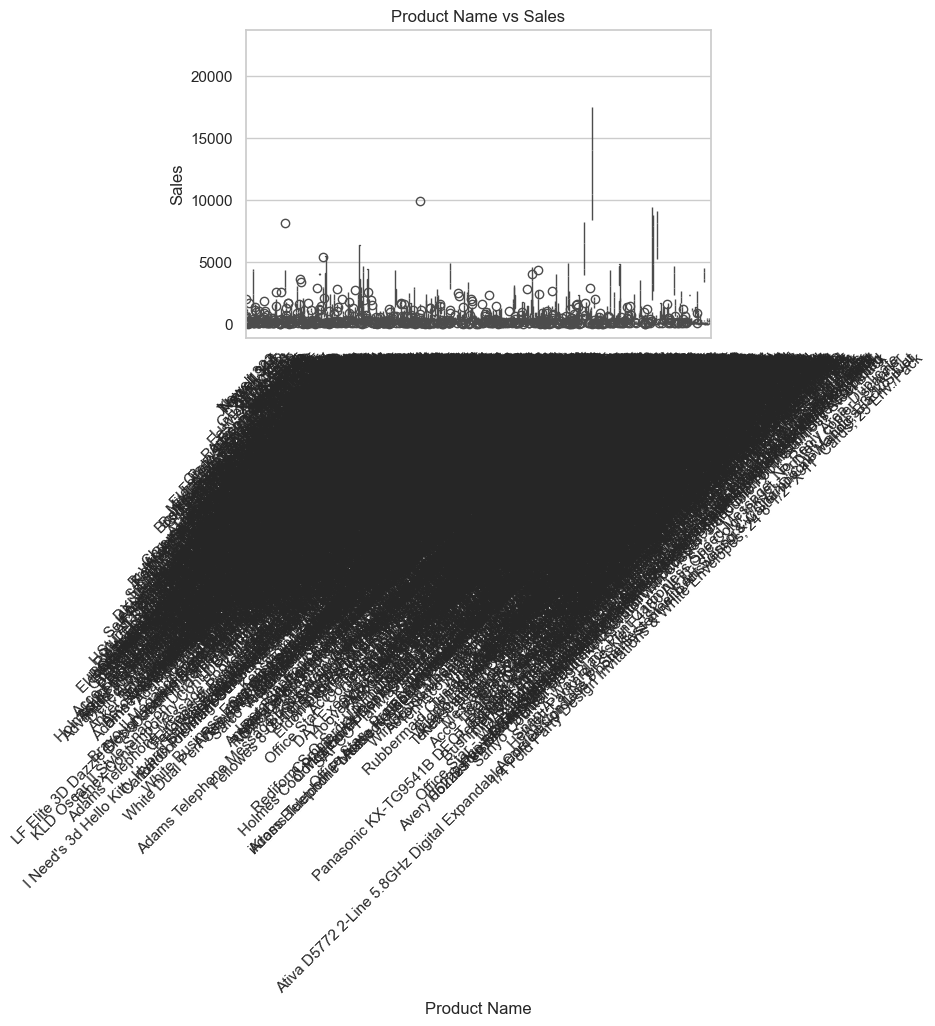

In [11]:
# Box plots for categories
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='Sales')
    plt.title(f'{col} vs Sales')
    plt.xticks(rotation=45)
    plt.show()

# 5. Group Analysis

In [12]:
print(df.columns.tolist())

['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']


In [13]:
if 'Category' in df.columns:
    grouped = df.groupby('Category')['Sales'].agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False)
    print(grouped)

                 count        mean          sum
Category                                       
Technology        1813  456.401474  827455.8730
Furniture         2078  350.653790  728658.5757
Office Supplies   5909  119.381001  705422.3340


# 6. Advanced Python Techniques

In [14]:
# Lambda: categorize sales
if 'Sales' in df.columns:
    df['Sales_Range'] = df['Sales'].apply(lambda x: 'High' if x > df['Sales'].mean() else 'Low')

# UDF: Categorize products by price (example)
def categorize_price(x):
    if x < 100:
        return 'Low'
    elif x < 300:
        return 'Medium'
    return 'High'

if 'Price' in df.columns:
    df['Price_Category'] = df['Price'].apply(categorize_price) 
print(df[['Sales', 'Sales_Range']].head())

      Sales Sales_Range
0  261.9600        High
1  731.9400        High
2   14.6200         Low
3  957.5775        High
4   22.3680         Low


In [15]:
# List comprehension: columns with missing values
missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
print("Columns with missing values:", missing_cols)

Columns with missing values: ['Postal Code']


# 7. Summary & Insights

- Duplicates removed: {duplicates}
- Features with missing values: {list(missing.keys())}
- Strong correlations found between [feature1] and Sales
- High sales observed in [Category/Product/Region]
- Recommendation: Consider time-series trends if data has timestamps

Next steps could involve time-series forecasting or classification modeling.
